In [3]:
import numpy as np
from scipy.stats import binom, poisson, expon, beta, uniform
from scipy.special import binom as binomCof
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import minimize, minimize_scalar

In [2]:
%load_ext autoreload
%autoreload 2
from libs.tree import Node

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
def utility(x, R):
    u = 1 - np.exp(-x/R)
    
    return u

In [56]:
x = np.arange(0,1100, 100)
x

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])

In [57]:
y = utility(x, 1210)
y

array([0.        , 0.07932173, 0.15235152, 0.21958846, 0.28149205,
       0.33848534, 0.39095783, 0.43926811, 0.48374633, 0.52469646,
       0.56239836])

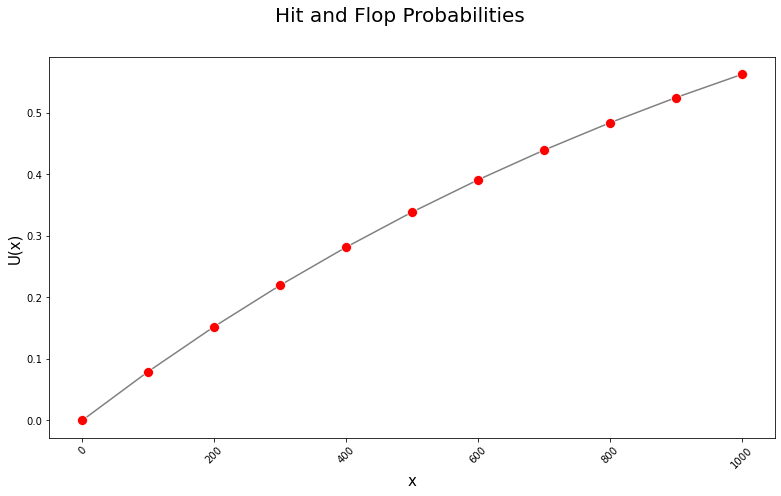

In [58]:
fig , ax = plt.subplots(1,1, figsize=(13,7))

plt.suptitle('Hit and Flop Probabilities', fontsize=20)
sns.lineplot(x=x, y=y, color='gray', 
             marker='o', markersize=10, markerfacecolor='red')
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('U(x)', fontsize=15)

#plt.legend()
plt.show()

In [59]:
x = np.array([1000, 800, 0,-1250])
for i in x: 
    y = utility(i, 1210)
    print(f'U({i}) = {np.round(y,2)}')

U(1000) = 0.56
U(800) = 0.48
U(0) = 0.0
U(-1250) = -1.81


In [60]:
probs = np.array([0.33, 0.21, 0.33, 0.13])
np.sum(probs)

1.0

In [61]:
np.dot(probs, x)

335.5

In [62]:
np.dot(probs, utility(x, 1210))

0.051924443892442496

### BOOK TEST

In [63]:
R = 900

x = np.array([2000, 1000, 500])
probs = [0.4, 0.4, 0.2]

In [64]:
eu = np.dot(probs, utility(x, R))
eu

0.7102249114405929

In [65]:
def objective_function_test(x):
    #(a, b) = v
    loss  = np.square(1-np.exp(-x/900) - eu) 
        
    return loss

In [66]:
res = minimize(objective_function_test, x0 = 0.5)
res

      fun: 7.961844112347834e-06
 hess_inv: array([[3610064.08954577]])
      jac: array([-1.83468683e-06])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 7
     njev: 16
   status: 0
  success: True
        x: array([1106.06386939])

In [68]:
mu = np.dot(probs, x)
mu

1300.0

In [69]:
var = np.dot(probs, np.square(x-mu))
var, np.sqrt(var), np.square(np.sqrt(var))

(360000.0, 600.0, 360000.0)

In [70]:
ce = mu - (0.5*var / R)
ce

1100.0

### HW

In [71]:
R = 1210

x = np.array([1000, 800, 0, -1250])
probs = [0.33,0.21, 0.33, 0.13]

In [72]:
eu = np.dot(probs, utility(x, R))
eu

0.051924443892442496

In [73]:
def objective_function(x):
    #(a, b) = v
    loss  = np.square(1-np.exp(-x/1210) - eu) 
        
    return loss

In [74]:
res = minimize(objective_function, x0 = 0.5)
res

      fun: 4.434209616453271e-06
 hess_inv: array([[723177.48705305]])
      jac: array([-3.30720098e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 3
     njev: 12
   status: 0
  success: True
        x: array([61.83397349])

In [75]:
mu = np.dot(probs, x)
mu

335.5

In [76]:
premium = mu - 61.8334
premium

273.6666

In [77]:
var = np.dot(probs, np.square(x-mu))
var, np.sqrt(var), np.square(np.sqrt(var))

(554964.75, 744.9595626609541, 554964.75)

In [78]:
ce = mu - (0.5*var / R)
ce

106.17572314049588

In [79]:
ce = 2400 - (0.5*np.square(300) / R)
ce

2362.809917355372

## P2

In [80]:
x = [0,2,3,5,10.3]
d1 = [1,2.6,2.8,2.9,3]
d2 = [0,8,15,30,100]
d3 = [6,13,16.5,23.5,42.05]

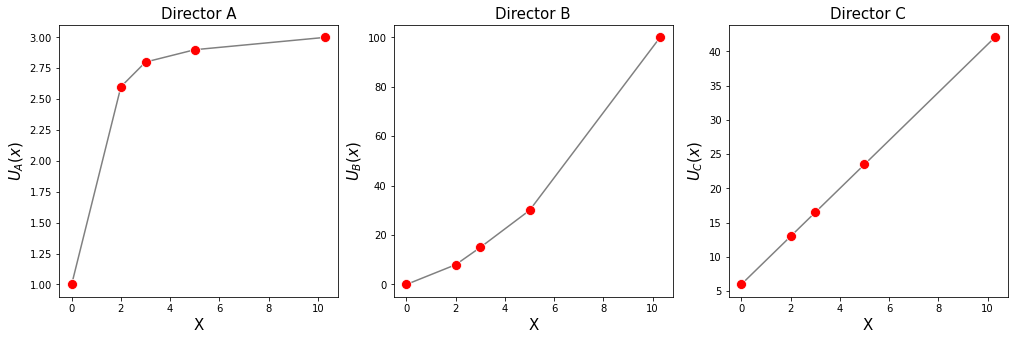

In [82]:
fig , axes = plt.subplots(1,3, figsize=(17,5))

#plt.suptitle('Utility functions pero Director', fontsize=20)
ax = axes[0]
ax.set_title('Director A', fontsize=15)
sns.lineplot(x=x, y=d1, color='gray', 
             marker='o', markersize=10, markerfacecolor='red', ax=ax)
#ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('$U_A(x)$', fontsize=15)

ax = axes[1]
ax.set_title('Director B', fontsize=15)
sns.lineplot(x=x, y=d2, color='gray', 
             marker='o', markersize=10, markerfacecolor='red', ax=ax)
#ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('$U_B(x)$', fontsize=15)

ax = axes[2]
ax.set_title('Director C', fontsize=15)
sns.lineplot(x=x, y=d3, color='gray', 
             marker='o', markersize=10, markerfacecolor='red', ax=ax)
#ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('$U_C(x)$', fontsize=15)

#plt.legend()
plt.show()

### TEXACO

In [38]:
t3 = [
['T', 10.3],
['T', 5],
['T', 0],
]

ta = ['T', 2]
tb = ['T', 5]
tc = ['T', 3]

In [39]:
c1 = ['C', [.17, .5, .33]]

c2 = ['C', [.2, .5, .3]]
c3 = ['C', [.2, .5, .3]]

In [40]:
C1 = Node(*c1)


C2 = Node(*c2)
C3 = Node(*c3)
for i in t3:
    n = Node(*i)
    C2.children.append(n)
    C3.children.append(n)


D2 = Node(*['D', 0])
D2.children.append(C3)
D2.children.append(Node(*tc))


C1.children.append(Node(*tb))
C1.children.append(C2)
C1.children.append(D2)

D1 = Node(*['D',0])
D1.children.append(Node(*ta))
D1.children.append(C1)

In [41]:
D1.compute()

    TYPE C
    TYPE T
    val 2
    TYPE C
        TYPE T
        val 5
        TYPE C
        TYPE T
        val 10.3
        TYPE T
        val 5
        TYPE T
        val 0
        VALUE >>> 4.5600000000000005
        TYPE C
    TYPE C
            TYPE T
            val 10.3
            TYPE T
            val 5
            TYPE T
            val 0
    VALUE >>> 4.5600000000000005
    TYPE T
    val 3
        VALUE >>> 4.5600000000000005
    VALUE >>> 4.6348
    VALUE >>> 4.6348


4.6348

### Liedtke

In [48]:
t3 = [
['T', 1],
['T', 0.75],
['T', 0],
]

ta = ['T', 0.45]
tb = ['T', 0.75]
tc = ['T', 0.60]

C2 = Node(*c2)
C3 = Node(*c3)
for i in t3:
    n = Node(*i)
    C2.children.append(n)
    C3.children.append(n)


D2 = Node(*['D', 0])
D2.children.append(C3)
D2.children.append(Node(*tc))

C1 = Node(*c1)
C1.children.append(Node(*tb))
C1.children.append(C2)
C1.children.append(D2)

D1 = Node(*['D',0])
D1.children.append(Node(*ta))
D1.children.append(C1)

In [49]:
D1.compute()

    TYPE C
    TYPE T
    val 0.45
    TYPE C
        TYPE T
        val 0.75
        TYPE C
        TYPE T
        val 1
        TYPE T
        val 0.75
        TYPE T
        val 0
        VALUE >>> 0.575
        TYPE C
    TYPE C
            TYPE T
            val 1
            TYPE T
            val 0.75
            TYPE T
            val 0
    VALUE >>> 0.575
    TYPE T
    val 0.6
        VALUE >>> 0.6
    VALUE >>> 0.613
    VALUE >>> 0.613


0.613

### Director 1

In [83]:
t3 = [
['T', 3], # 10.3
['T', 2.9], # 5
['T', 1], # 0
]

ta = ['T', 2.6] # 2
tb = ['T', 2.9] # 5
tc = ['T', 2.8] # 3

C2 = Node(*c2)
C3 = Node(*c3)
for i in t3:
    n = Node(*i)
    C2.children.append(n)
    C3.children.append(n)


D2 = Node(*['D', 0])
D2.children.append(C3)
D2.children.append(Node(*tc))

C1 = Node(*c1)
C1.children.append(Node(*tb))
C1.children.append(C2)
C1.children.append(D2)

D1 = Node(*['D',0])
D1.children.append(Node(*ta))
D1.children.append(C1)

In [84]:
D1.compute()

    TYPE C
    TYPE T
    val 2.6
    TYPE C
        TYPE T
        val 2.9
        TYPE C
        TYPE T
        val 3
        TYPE T
        val 2.9
        TYPE T
        val 1
        VALUE >>> 2.3499999999999996
        TYPE C
    TYPE C
            TYPE T
            val 3
            TYPE T
            val 2.9
            TYPE T
            val 1
    VALUE >>> 2.3499999999999996
    TYPE T
    val 2.8
        VALUE >>> 2.8
    VALUE >>> 2.5919999999999996
    VALUE >>> 2.6


2.6

### Director 2

In [50]:
t3 = [
['T', 100], # 10.3
['T', 30], # 5
['T', 0], # 0
]

ta = ['T', 8] # 2
tb = ['T', 30] # 5
tc = ['T', 15] # 3

C2 = Node(*c2)
C3 = Node(*c3)
for i in t3:
    n = Node(*i)
    C2.children.append(n)
    C3.children.append(n)


D2 = Node(*['D', 0])
D2.children.append(C3)
D2.children.append(Node(*tc))

C1 = Node(*c1)
C1.children.append(Node(*tb))
C1.children.append(C2)
C1.children.append(D2)

D1 = Node(*['D',0])
D1.children.append(Node(*ta))
D1.children.append(C1)

In [51]:
D1.compute()

    TYPE C
    TYPE T
    val 8
    TYPE C
        TYPE T
        val 30
        TYPE C
        TYPE T
        val 100
        TYPE T
        val 30
        TYPE T
        val 0
        VALUE >>> 35.0
        TYPE C
    TYPE C
            TYPE T
            val 100
            TYPE T
            val 30
            TYPE T
            val 0
    VALUE >>> 35.0
    TYPE T
    val 15
        VALUE >>> 35.0
    VALUE >>> 34.150000000000006
    VALUE >>> 34.150000000000006


34.150000000000006

### Director 3

In [52]:
t3 = [
['T', 42.05], # 10.3
['T', 23.5], # 5
['T', 6], # 0
]

ta = ['T', 13] # 2
tb = ['T', 23.5] # 5
tc = ['T', 16.5] # 3

C2 = Node(*c2)
C3 = Node(*c3)
for i in t3:
    n = Node(*i)
    C2.children.append(n)
    C3.children.append(n)


D2 = Node(*['D', 0])
D2.children.append(C3)
D2.children.append(Node(*tc))

C1 = Node(*c1)
C1.children.append(Node(*tb))
C1.children.append(C2)
C1.children.append(D2)

D1 = Node(*['D',0])
D1.children.append(Node(*ta))
D1.children.append(C1)

In [53]:
D1.compute()

    TYPE C
    TYPE T
    val 13
    TYPE C
        TYPE T
        val 23.5
        TYPE C
        TYPE T
        val 42.05
        TYPE T
        val 23.5
        TYPE T
        val 6
        VALUE >>> 21.96
        TYPE C
    TYPE C
            TYPE T
            val 42.05
            TYPE T
            val 23.5
            TYPE T
            val 6
    VALUE >>> 21.96
    TYPE T
    val 16.5
        VALUE >>> 21.96
    VALUE >>> 22.2218
    VALUE >>> 22.2218


22.2218

## P4

In [91]:
asset = 2500

l1 = 0.2*np.log(asset + 10000) + 0.8*np.log(asset + 1000)
print(f'EU(l1): {l1}')
l2 = 0.9*np.log(asset + 3000) + 0.1*np.log(asset + 2000)
print(f'EU(l2): {l2}')

EU(l1): 8.415111382640083
EU(l2): 8.592436301674347


In [92]:
asset = 5000

l1 = 0.2*np.log(asset + 10000) + 0.8*np.log(asset + 1000)
print(f'EU(l1): {l1}')
l2 = 0.9*np.log(asset + 3000) + 0.1*np.log(asset + 2000)
print(f'EU(l2): {l2}')

EU(l1): 8.882772894585024
EU(l2): 8.97384368139952


In [93]:
asset = 10000

l1 = 0.2*np.log(asset + 10000) + 0.8*np.log(asset + 1000)
print(f'EU(l1): {l1}')
l2 = 0.9*np.log(asset + 3000) + 0.1*np.log(asset + 2000)
print(f'EU(l2): {l2}')

EU(l1): 9.425217951931632
EU(l2): 9.46470036567632


In [100]:
x = np.arange(1, 10000, 1000)
y = np.log(x)

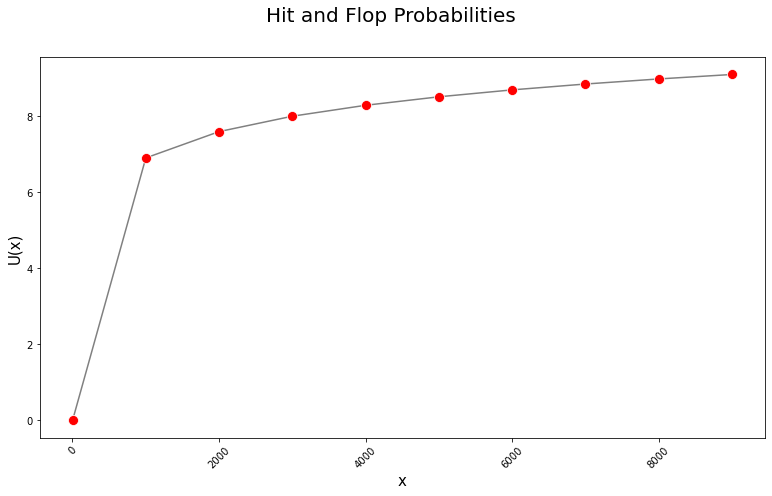

In [101]:
fig , ax = plt.subplots(1,1, figsize=(13,7))

plt.suptitle('Hit and Flop Probabilities', fontsize=20)
sns.lineplot(x=x, y=y, color='gray', 
             marker='o', markersize=10, markerfacecolor='red')
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('U(x)', fontsize=15)

#plt.legend()
plt.show()

In [103]:
x = np.array([1,2,3,4])
y = np.array([1,0.7,0.35,0])

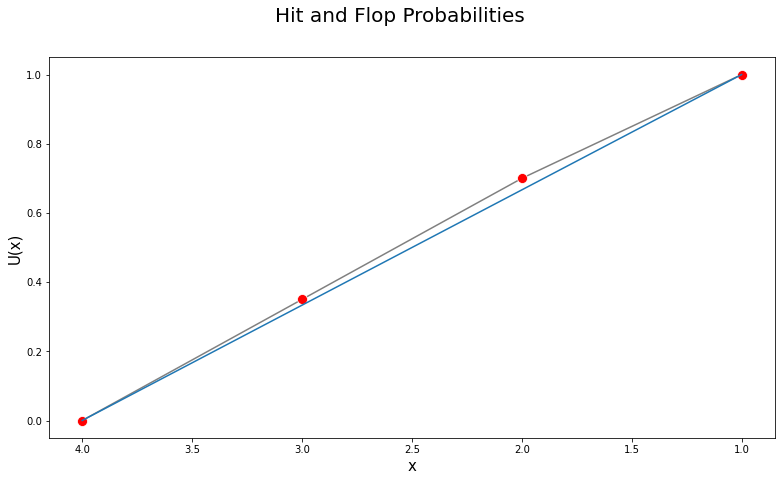

In [108]:
fig , ax = plt.subplots(1,1, figsize=(13,7))

plt.suptitle('Hit and Flop Probabilities', fontsize=20)
sns.lineplot(x=x, y=y, color='gray', 
             marker='o', markersize=10, markerfacecolor='red')
plt.plot([1,4],[1,0])
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('U(x)', fontsize=15)

plt.gca().invert_xaxis()
#plt.legend()
plt.show()